In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

C:\Users\Marcos\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Creación de dos conjuntos de datos: Datos X y clases Y.

In [3]:
x_vals = np.concatenate((np.random.normal(-2,1,100), np.random.normal(2,1,100)))
y_vals = np.concatenate((np.repeat(0.0,100), np.repeat(1.0,100)))

### Función de separación del dataset X en entrenamiento y test

In [4]:
size_split = 0.8
def train_test_split(x_vals, y_vals):
    idx = np.random.choice(len(x_vals),round(len(x_vals)*0.8), replace=False)
    train_x = x_vals[idx]
    train_y = y_vals[idx]
    test_x = x_vals[list(set(range(200))-set(idx))]
    test_y = y_vals[list(set(range(200))-set(idx))]
                        
    return [train_x, train_y, test_x, test_y]

### Creacción de un modelo en tensorflow para clasificación

In [5]:
#Creamos los placeholdes, esto es, los datos que se van a pasar al optimizador.
x_data = tf.placeholder(shape=[None,None], dtype = tf.float32)
y_target = tf.placeholder(shape=[None,None], dtype = tf.float32)

#La variable de media 10.
A = tf.Variable(np.random.normal(10))

session = tf.Session()
init = tf.global_variables_initializer()
session.run(init)
session.run(A)

10.404954

In [6]:
#Obtenemos los conjuntos de entrenamiento y test llamando a la función construída.
x_train, y_train, x_test, y_test = train_test_split(x_vals, y_vals)

In [7]:
#Creamos el modelo
prediction = tf.add(x_data, A) #La predicción es X+A
xentropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = prediction, labels = y_target))
opt = tf.train.GradientDescentOptimizer(learning_rate = 0.05)
train_step = opt.minimize(xentropy) #Minimizar la función de entropía.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Función de predicción

In [ ]:
def predictor(x_data,y_target):
    y_prediction = tf.squeeze(tf.round(tf.nn.sigmoid(tf.add(x_data, A))))
    correct_prediction = tf.equal(y_prediction, y_target)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return accuracy

prediction = predictor(x_data, y_target)

In [29]:
#Cuerpo del algoritmo.
num_its = 2000
batch_size = 1
for i in range(num_its):
    idx = np.random.choice(len(x_train), batch_size)
    x_train_selected = [x_train[idx]]
    y_train_selected = [y_train[idx]]
    session.run(train_step, feed_dict={x_data: x_train_selected, y_target: y_train_selected})
    if (i+1)%100 == 0:
        print("Paso #"+str(i+1)+
              " A = "+str(session.run(A))+
              " Loss = "+str(session.run(xentropy, feed_dict={x_data: x_train_selected, y_target: y_train_selected})))
    

Paso #100 A = 0.10790838 Loss = 0.04662271
Paso #200 A = 0.13826163 Loss = 0.08670405
Paso #300 A = 0.12480404 Loss = 0.14865524
Paso #400 A = 0.13950998 Loss = 0.080314286
Paso #500 A = 0.13863172 Loss = 0.047433887
Paso #600 A = 0.02659927 Loss = 0.30268085
Paso #700 A = 0.0533111 Loss = 0.022723816
Paso #800 A = 0.09482984 Loss = 0.18769589
Paso #900 A = 0.07789824 Loss = 0.078248575
Paso #1000 A = 0.007023323 Loss = 0.22553703
Paso #1100 A = 0.13831373 Loss = 0.11004416
Paso #1200 A = 0.08122951 Loss = 0.5219979
Paso #1300 A = 0.14392963 Loss = 0.050097734
Paso #1400 A = 0.19156872 Loss = 0.119358
Paso #1500 A = 0.2867215 Loss = 0.48337653
Paso #1600 A = 0.21033616 Loss = 0.054230113
Paso #1700 A = 0.020299964 Loss = 0.18770088
Paso #1800 A = 0.08158967 Loss = 0.11870262
Paso #1900 A = 0.13892367 Loss = 0.029927544
Paso #2000 A = 0.16664006 Loss = 0.19549806


### Evaluación del modelo de clasificación

In [30]:
#La función sigmoid determina tras el resultado si la variable es 0 o 1.
#En este caso será de 0 si es negativa y de 1 si es positiva.
#Hemos definido la operación como A + x donde A es la variables optimizada en el modelo anterior.
y_prediction = tf.squeeze(tf.round(tf.nn.sigmoid(tf.add(x_data, A))))
correct_prediction = tf.equal(y_prediction, y_target)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

acc_train = session.run(prediction, feed_dict={x_data: [x_train], y_target: [y_train]})
acc_test = session.run(prediction, feed_dict={x_data: [x_test], y_target: [y_test]})

print("Accuracy on training "+ str(acc_train))
print("Accuracy on testing "+ str(acc_test))

Accuracy on training 0.99375
Accuracy on testing 0.95


### Dibujar los datos

In [23]:
A_result = session.run(A)
A_result
[y_test]

[array([0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
        1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
        0., 1., 1., 1., 1., 1.])]

Text(0.5,1,'Clasificador binario de precisión 0.99375')

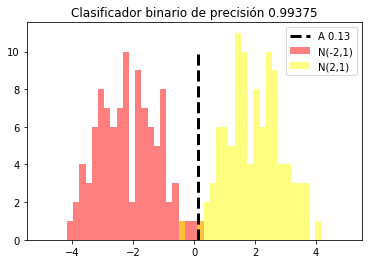

In [12]:
bins = np.linspace(-5,5,50)
plt.hist(x_vals[:100], bins, alpha=0.5, label = "N(-2,1)", color="red")
plt.hist(x_vals[100:200], bins, alpha=0.5, label = "N(2,1)", color="yellow")
plt.plot((A_result, A_result), (0,10), 'k--', linewidth=3, label = "A "+ str(np.round(A_result,2)))
plt.legend(loc="upper right")
plt.title("Clasificador binario de precisión "+ str(acc_train))

1.0

### Realizar una predicción

In [32]:
y_prediction = tf.squeeze(tf.round(tf.nn.sigmoid(tf.add(x_data, A))))
correct_prediction = tf.equal(y_prediction, y_target)

session.run(y_prediction, feed_dict={x_data:[np.array([0.1])]})


1.0